In [86]:
import requests
import datetime
import pandas as pd
from urllib.parse import urlencode
import json
import ast
import matplotlib.pyplot as plt

In [87]:
client_id = "b36a9334-2bb2-4880-bdc2-38bbaaec481f"
client_secret = "4f781612-6f3e-4cd4-90fe-1ab8c36cd26b"


In [92]:
BASE_URL = "https://frost.met.no/lightning/v0.ualf?"


params = {
    "referencetime": "latest",
    "maxage": "P10Y",
    "geometry": "POLYGON((10 59, 10 60, 11 60, 11 59, 10 59))"
}

# params = {
#     "referencetime": "2018-01-01/2018-01-20",
#     "geometry": "POLYGON((10 59, 10 60, 11 60, 11 59, 10 59))"
# }

In [94]:
results = requests.get(BASE_URL, params=params, auth=(client_id,client_secret))
results.raise_for_status()

In [95]:
int_type = (
    [True for i in range(8)] + [False for i in range(2)]
    + [True for i in range(4)] + [False for i in range(7)] + [True for i in range(4)]
)

In [96]:
lst = []
for line in results.text.split('\n'):
    lst.append([])
    for int_t, i in zip(int_type, line.split(' ')):
        try:
            if int_t:
                lst[-1].append(int(i))
            else:
                lst[-1].append(float(i))
        except ValueError:
            print(",", i)

, 


In [97]:
col_names = [
    "version", "year", "month", "day", "hour", "minutes", "seconds", "nanoseconds",
    "latitude", "longitude", "peakCurrent", "multiplicity", "numSensors",
    "degreesOfFreedom", "ellipseAngle", "semiMajorAxis", "semiMinorAxis", "chiSquareValue",
    "riseTime", "peakToZeroTime", "maxRateOfRise", "cloudIndicator", "angleIndicator", "signalIndicator", "timingIndicator"
]

In [98]:
df = pd.DataFrame(lst, columns=col_names)

In [99]:
df.head()

,version,year,month,day,hour,minutes,seconds,nanoseconds,latitude,longitude,...,semiMajorAxis,semiMinorAxis,chiSquareValue,riseTime,peakToZeroTime,maxRateOfRise,cloudIndicator,angleIndicator,signalIndicator,timingIndicator
0,0.0,2019.0,9.0,5.0,14.0,22.0,46.0,507712000.0,59.0094,10.6487,...,1.26,0.4,4.07,17.4,7.5,2.0,1.0,1.0,0.0,1.0
1,0.0,2019.0,9.0,5.0,14.0,12.0,48.0,572448512.0,59.0123,10.6457,...,0.46,0.4,3.18,22.4,10.5,-2.3,1.0,1.0,0.0,1.0
2,0.0,2019.0,9.0,5.0,13.0,45.0,31.0,984885248.0,59.0127,10.4513,...,0.40,0.4,3.99,26.9,14.7,-8.5,0.0,1.0,0.0,1.0
3,0.0,2019.0,9.0,5.0,13.0,45.0,31.0,970785536.0,59.0158,10.4449,...,0.40,0.4,3.44,18.4,11.1,-0.0,0.0,1.0,0.0,1.0
4,0.0,2019.0,9.0,5.0,13.0,45.0,31.0,935373056.0,59.0120,10.4546,...,0.40,0.4,0.60,10.3,16.1,-16.2,0.0,1.0,0.0,1.0


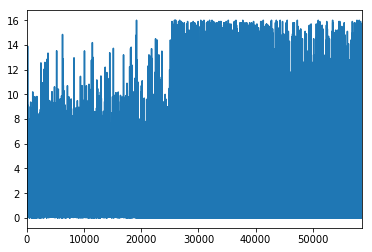

In [100]:
df["chiSquareValue"].plot()

In [102]:
df["year"].value_counts()

2014.0    20193
2019.0    12811
2018.0     4455
2013.0     4018
2010.0     3743
2011.0     3623
2016.0     3348
2015.0     2712
2017.0     2045
2012.0     1631
2009.0        6
Name: year, dtype: int64

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58586 entries, 0 to 58585
Data columns (total 25 columns):
version             58585 non-null float64
year                58585 non-null float64
month               58585 non-null float64
day                 58585 non-null float64
hour                58585 non-null float64
minutes             58585 non-null float64
seconds             58585 non-null float64
nanoseconds         58585 non-null float64
latitude            58585 non-null float64
longitude           58585 non-null float64
peakCurrent         58585 non-null float64
multiplicity        58585 non-null float64
numSensors          58585 non-null float64
degreesOfFreedom    58585 non-null float64
ellipseAngle        58585 non-null float64
semiMajorAxis       58585 non-null float64
semiMinorAxis       58585 non-null float64
chiSquareValue      58585 non-null float64
riseTime            58585 non-null float64
peakToZeroTime      58585 non-null float64
maxRateOfRise       58585 non-n